## Step 4: Data Wrangling

Start off by connecting to the database (as above), import pandas as pd, and then load back your DataFrames: airlines, airports, routes and incidents (not counting flights, which will take forever to load) from SQL, using the syntax:

```
    dataframe = pd.read_sql_query('select * from table_name', engine)
```

In [179]:
import sqlite3
import pandas as pd

engine = sqlite3.connect('HW1_DB')

# TODO: Re-load dataframes from SQL
try:
    airports_df = pd.read_sql_query('select * from airports', engine)
    airlines_df = pd.read_sql_query('select * from airlines', engine)
    routes_df = pd.read_sql_query('select * from routes', engine)
    incidents_df = pd.read_sql_query('select * from incidents', engine)
#     flights_df = pd.read_sql_query('select * from flights', engine)
# YOUR CODE HERE
except:
    raise NotImplementedError()

In [180]:
if 'index' in airlines_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')
    
if 'index' in airports_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

if 'index' in routes_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

if 'index' in incidents_df.columns:
    raise ValueError('SQL added an index column -- shouldn''t have that plus the Pandas index')

## Step 4.1: Understanding our data

Take a look at the details of our dataframes...

In [181]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6048 entries, 0 to 6047
Data columns (total 8 columns):
airline_id          6048 non-null int64
airline_name        6048 non-null object
airline_alias       6048 non-null object
airline_iata        6048 non-null object
airline_icao        6048 non-null object
airline_callsign    6048 non-null object
country             6048 non-null object
active              6048 non-null object
dtypes: int64(1), object(7)
memory usage: 378.1+ KB


In [182]:
airlines_df

airline_id                                  airline_name  \
0              1                                Private flight   
1              2                                   135 Airways   
2              3                                 1Time Airline   
3              4  2 Sqn No 1 Elementary Flying Training School   
4              5                               213 Flight Unit   
5              6                 223 Flight Unit State Airline   
6              7                             224th Flight Unit   
7              8                                   247 Jet Ltd   
8              9                                   3D Aviation   
9             10                                   40-Mile Air   
10            11                                        4D Air   
11            12                        611897 Alberta Limited   
12            13                              Ansett Australia   
13            14                          Abacus International   
14            15                               Abelag Aviation   
15            16                                Army Air Corps   
16            17                     Aero Aviation Centre Ltd.   
17            18     Aero Servicios Ejecutivos Internacionales   
18            19                                   Aero Biniza   
19            20                                 Aero Albatros   
20            21                                    Aigle Azur   
21            22                                Aloha Airlines   
22            23                             Alaska Island Air   
23            24                             American Airlines   
24            25               Aviation Management Corporation   
25            26                       Atlantis Airlines (USA)   
26            27                            Aerovista Airlines   
27            28                               Asiana Airlines   
28            29                               Askari Aviation   
29            30                       Australia Asia Airlines   
...          ...                                           ...   
6018       19651               CARICOM AIRWAYS (BARBADOS) INC.   
6019       19674                             Rainbow Air (RAI)   
6020       19675                            Rainbow Air Canada   
6021       19676                         Rainbow Air Polynesia   
6022       19677                              Rainbow Air Euro   
6023       19678                                Rainbow Air US   
6024       19745                                  Transilvania   
6025       19751                                      Dobrolet   
6026       19774                                Spike Airlines   
6027       19776                            Grand Cru Airlines   
6028       19785                                        Go2Sky   
6029       19803                                 All Argentina   
6030       19804                                   All America   
6031       19805                                      All Asia   
6032       19806                                    All Africa   
6033       19807                             Regionalia México   
6034       19808                                    All Europe   
6035       19809                                     All Spain   
6036       19810                          Regional Air Iceland   
6037       19811                           British Air Ferries   
6038       19812                                       Voestar   
6039       19813                                  All Colombia   
6040       19814                            Regionalia Uruguay   
6041       19815                          Regionalia Venezuela   
6042       19827                              Regionalia Chile   
6043       19828                                    Vuela Cuba   
6044       19830                                 All Australia   
6045       19831                                    Fly Europa   
6046       19834                              

In [183]:
airlines_df.describe()

airline_id
count   6048.000000
mean    3844.729167
std     3945.495487
min       -1.000000
25%     1512.750000
50%     3025.500000
75%     4543.250000
max    19845.000000

In [184]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8107 entries, 0 to 8106
Data columns (total 12 columns):
airport_id      8107 non-null int64
airport_name    8107 non-null object
city            8107 non-null object
country         8107 non-null object
iata            8107 non-null object
icao            8107 non-null object
lat             8107 non-null float64
lon             8107 non-null float64
alt             8107 non-null int64
timezone        8107 non-null float64
dst             8107 non-null object
tz              8107 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


In [185]:
airports_df

airport_id                       airport_name                city  \
0              1                             Goroka              Goroka   
1              2                             Madang              Madang   
2              3                        Mount Hagen         Mount Hagen   
3              4                             Nadzab              Nadzab   
4              5         Port Moresby Jacksons Intl        Port Moresby   
5              6                         Wewak Intl               Wewak   
6              7                         Narsarsuaq        Narssarssuaq   
7              8                               Nuuk            Godthaab   
8              9                  Sondre Stromfjord         Sondrestrom   
9             10                     Thule Air Base               Thule   
10            11                           Akureyri            Akureyri   
11            12                        Egilsstadir         Egilsstadir   
12            13                       Hornafjordur                Hofn   
13            14                            Husavik             Husavik   
14            15                         Isafjordur          Isafjordur   
15            16     Keflavik International Airport            Keflavik   
16            17                     Patreksfjordur      Patreksfjordur   
17            18                          Reykjavik           Reykjavik   
18            19                       Siglufjordur        Siglufjordur   
19            20                     Vestmannaeyjar      Vestmannaeyjar   
20            21                    Sault Ste Marie  Sault Sainte Marie   
21            22                Winnipeg St Andrews            Winnipeg   
22            23                         Shearwater             Halifax   
23            24                         St Anthony         St. Anthony   
24            25                             Tofino              Tofino   
25            26                           Kugaaruk           Pelly Bay   
26            27                        Baie Comeau         Baie Comeau   
27            28                         Bagotville          Bagotville   
28            29                         Baker Lake          Baker Lake   
29            30                     Campbell River      Campbell River   
...          ...                                ...                 ...   
8077        9512                    Port of Seattle             Seattle   
8078        9513                     Ferry Terminal            Whittier   
8079        9514                     Ferry Terminal              Valdez   
8080        9515                      Gare Routiere         Saint-Louis   
8081        9516                           Bus Stop          La Riviere   
8082        9517                           Bus Stop              Cilaos   
8083        9518                           Bus Stop          Hell-Bourg   
8084        9519                           Bus Stop             Salazie   
8085        9520                               Gare            St Andre   
8086        9521               L'Ocean Bus Terminal         Saint Denis   
8087        9522                      Gare Routiere        Saint Pierre   
8088        9523                      Baie Ste Anne             Praslin   
8089        9524                           La Passe            La Digue   
8090        9525                         Ferry Dock   Bainbridge Island   
8091        9526                                Bus          Phnom Penh   
8092        9527                                Bus           Siem Reap   
8093        9528                                Bus       Sihanoukville   
8094        9529                                Bus              Kampot   
8095        9530                                Bus                 Kep   
8096        9531                       Main Station              Taipei   
8097        9532                     Prominent Hill      Prominent Hill   
8098        9533               

In [186]:
airports_df.describe()

airport_id          lat          lon           alt     timezone
count  8107.000000  8107.000000  8107.000000   8107.000000  8107.000000
mean   4766.361046    26.817720    -3.921969    933.449365     0.169236
std    2943.205193    27.866953    85.900873   1624.740899     5.737326
min       1.000000   -89.999997  -179.877000  -1266.000000   -12.000000
25%    2091.500000     8.824928   -79.022498     38.000000    -5.000000
50%    4257.000000    34.987800     5.292028    272.000000     1.000000
75%    7508.500000    47.957599    49.785821   1020.000000     4.000000
max    9541.000000    82.517778   179.951000  14472.000000    13.000000

In [187]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66548 entries, 0 to 66547
Data columns (total 9 columns):
airline_iata        66548 non-null object
airline_id          66548 non-null int64
src_iata_icao       66548 non-null object
source_id           66548 non-null int64
target_iata_icao    66548 non-null object
target_id           66548 non-null int64
code_share          66548 non-null object
stops               66548 non-null int64
equipment           66548 non-null object
dtypes: int64(4), object(5)
memory usage: 4.6+ MB


In [188]:
routes_df

airline_iata  airline_id src_iata_icao  source_id target_iata_icao  \
0               2B         410           AER       2965              KZN   
1               2B         410           ASF       2966              KZN   
2               2B         410           ASF       2966              MRV   
3               2B         410           CEK       2968              KZN   
4               2B         410           CEK       2968              OVB   
5               2B         410           DME       4029              KZN   
6               2B         410           DME       4029              NBC   
7               2B         410           DME       4029              UUA   
8               2B         410           EGO       6156              KGD   
9               2B         410           EGO       6156              KZN   
10              2B         410           GYD       2922              NBC   
11              2B         410           KGD       2952              EGO   
12              2B         410           KZN       2990              AER   
13              2B         410           KZN       2990              ASF   
14              2B         410           KZN       2990              CEK   
15              2B         410           KZN       2990              DME   
16              2B         410           KZN       2990              EGO   
17              2B         410           KZN       2990              LED   
18              2B         410           KZN       2990              SVX   
19              2B         410           LED       2948              KZN   
20              2B         410           LED       2948              NBC   
21              2B         410           LED       2948              UUA   
22              2B         410           MRV       2962              ASF   
23              2B         410           NBC       6969              DME   
24              2B         410           NBC       6969              GYD   
25              2B         410           NBC       6969              LED   
26              2B         410           NBC       6969              SVX   
27              2B         410           NJC       2972              SVX   
28              2B         410           NJC       2972              UUA   
29              2B         410           NUX       4364              SVX   
...            ...         ...           ...        ...              ...   
66518           ZL        4178           SYD       3361              ABX   
66519           ZL        4178           SYD       3361              ARM   
66520           ZL        4178           SYD       3361              BHQ   
66521           ZL        4178           SYD       3361              BHS   
66522           ZL        4178           SYD       3361              BNK   
66523           ZL        4178           SYD       3361              DBO   
66524           ZL        4178           SYD       3361              GFF   
66525           ZL        4178           SYD       3361              LSY   
66526           ZL        4178           SYD       3361              MIM   
66527           ZL        4178           SYD       3361              MQL   
66528           ZL        4178           SYD       3361              MYA   
66529           ZL        4178           SYD       3361              NRA   
66530           ZL        4178           SYD       3361              NTL   
66531           ZL        4178           SYD       3361              OAG   
66532           ZL        4178           SYD       3361              PKE   
66533           ZL        4178           SYD       3361              TRO   
66534           ZL        4178           SYD       3361              WGA   
66535           ZL        4178           TRO       6794              GFN   
66536           ZL        4178           TRO       6794              SYD   
66537           ZL        4178           TSV       3330              ISA   
66538           ZL        4178           TSV       333

In [189]:
routes_df.describe()

airline_id     source_id     target_id         stops
count  66548.000000  66548.000000  66548.000000  66548.000000
mean    3367.569754   2660.201929   2662.088192      0.000165
std     3182.024330   1577.965637   1578.661433      0.012856
min       10.000000      1.000000      1.000000      0.000000
25%     1317.000000   1382.000000   1382.000000      0.000000
50%     2942.000000   2958.000000   2958.000000      0.000000
75%     4608.000000   3670.000000   3670.000000      0.000000
max    19676.000000   9327.000000   9327.000000      1.000000

In [190]:
incidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 3 columns):
Date         331 non-null object
Airline      331 non-null object
FlightNum    331 non-null object
dtypes: object(3)
memory usage: 7.8+ KB


In [191]:
incidents_df

Date                            Airline FlightNum
0    1997-01-09 00:00:00                             Comair      3272
1    1997-03-18 00:00:00  Stavropolskaya Aktsionernaya Avia      1023
2    1997-04-19 00:00:00         Merpati Nusantara Airlines       106
3    1997-05-08 00:00:00            China Southern Airlines      3456
4    1997-07-31 00:00:00                      FedEx Express        14
5    1997-07-17 00:00:00                        Sempati Air       304
6    1997-08-06 00:00:00                         Korean Air       801
7    1997-08-10 00:00:00                   Formosa Airlines      7601
8    1997-09-03 00:00:00                   Vietnam Airlines       815
9    1997-09-06 00:00:00              Royal Brunei Airlines       238
10   1997-09-26 00:00:00                   Garuda Indonesia       152
11   1997-10-10 00:00:00              Austral Líneas Aéreas      2553
12   1997-12-15 00:00:00                Tajikistan Airlines      3183
13   1997-12-17 00:00:00                           Aerosvit       241
14   1997-12-19 00:00:00                            SilkAir       185
15   1997-12-28 00:00:00                    United Airlines       826
16   1998-02-02 00:00:00                       Cebu Pacific       387
17   1998-02-16 00:00:00                     China Airlines       676
18   1998-03-22 00:00:00                Philippine Airlines       137
19   1998-04-20 00:00:00                         Air France       422
20   1998-05-25 00:00:00                                PIA       544
21   1998-06-18 00:00:00                            Propair       420
22   1998-07-30 00:00:00                   Proteus Airlines      706:
23   1998-08-24 00:00:00                     Myanma Airways       635
24   1998-08-29 00:00:00                 Cubana de Aviación       389
25   1998-09-02 00:00:00                           Swissair       111
26   1998-09-25 00:00:00                           PauknAir      4101
27   1998-09-29 00:00:00                            Lionair       602
28   1998-12-11 00:00:00         Thai Airways International       261
29   1999-02-24 00:00:00           China Southwest Airlines      4509
..                   ...                                ...       ...
301  2015-09-05 00:00:00    Ceiba Intercontinental Airlines        71
302  2015-09-08 00:00:00                    British Airways      2276
303  2015-10-02 00:00:00                           Aviastar      7503
304  2015-10-29 00:00:00                    Dynamic Airways       405
305  2015-10-31 00:00:00                           Metrojet      9268
306  2016-01-08 00:00:00                    West Air Sweden       294
307  2016-02-02 00:00:00                    Daallo Airlines       159
308  2016-02-24 00:00:00                           Tara Air       193
309  2016-03-19 00:00:00                           Flydubai       981
310  2016-03-29 00:00:00                           EgyptAir       181
311  2016-04-04 00:00:00                          Batik Air      7703
312  2016-05-19 00:00:00                           EgyptAir       804
313  2016-05-27 00:00:00                         Korean Air      2708
314  2016-06-27 00:00:00                 Singapore Airlines       368
315  2016-08-03 00:00:00                           Emirates       521
316  2016-08-05 00:00:00               ASL Airlines Hungary      7332
317  2016-08-27 00:00:00                 Southwest Airlines      3472
318  2016-10-28 00:00:00                  American Airlines       383
319  2016-10-28 00:00:00                      FedEx Express       910
320  2016-11-28 00:00:00                     LaMia Airlines      2933
321  2016-12-07 00:00:00    Pakistan International Airlines       661
322  2016-12-20 00:00:00                          Aerosucre      4544
323  2016-12-23 00:00:00                  Afriqiyah Airways       209
324  2017-01-16 00:00:00                   Turkish Airlines      6491
325  2017-03-28 00:00:00                  Peruvian Airlines       112
326  2017-05-27 00:00:00      

In [192]:
incidents_df.describe()

Date            Airline FlightNum
count                   331                331       331
unique                  309                240       302
top     2001-09-11 00:00:00  American Airlines       120
freq                      8                  8         3


We would expect certain characteristics, such as every airport to have flights, and every airport to be a source and a destination. (Otherwise we’d have a situation where some airports pile up airplanes, and others have no planes!)

Take a look at our data and compute:
* How many airports are origins in a route?
* How many airports are destinations in a route?
* How many cities are in the list of airports?


Output these in a dictionary called results with three keys: {'airports’: _, 'destinations': _, 'sources’: _}

In [193]:
# YOUR CODE HERE
try:
    unique_airports = len(airports_df['city'].unique())
    unique_destinations = len(routes_df['target_id'].unique())
    unique_sources = len(routes_df['source_id'].unique())
except:
    raise NotImplementedError()

In [194]:
# TODO: output dictionary results {‘airports’: ___, ‘destinations’: ___, ‘sources’: ___}
try:
    results = {'airports': unique_airports, 'destinations': unique_destinations, 'origins': unique_sources}
# YOUR CODE HERE
except:
    raise NotImplementedError()

In [195]:
if 'origins' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')
    
if 'destinations' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')

if 'airports' not in results:
    raise KeyError('Missing key ''origins'' from dictionary')


# 4.2 Looking at Joint Data

Now let's combine information from the different sources!

## Step 4.2.1 Combining DataFrames via Merge (also known as Join)

The first question is which airports are in the data as destinations, but not as sources.  Set the variable `flyable_df` to a dataframe containing the number of airports you can fly to, but not from.  Be sure to eliminate duplicates.

You’ll need to do a merge (join) with the original `airports_df` DataFrame.  Note that `dataframe.merge()` can be called with a second DataFrame, as well as the columns to match (`left_on`, `right_on`).

In [229]:
# TODO: Compute airports you can fly to by not from, in the variable flyable_df
try:
    lst = []
    origins = list(routes_df['source_id'].drop_duplicates())
    targets = list(routes_df['target_id'].drop_duplicates())
    
    for i in targets:
        if i not in origins:
            lst.append(i)

    airport_identification = []
    for i in lst:
        if (airports_df['airport_id'] ==  int(i)).any():
            airport_identification.append(str(airports_df[airports_df['airport_id'] == int(i)]['airport_name']))
    
    for i in airport_identification:
        detail,_ = i.split('\n') 
        airport_name_id = detail[4:].strip() #the format of the number = 4 characters
        airport_identification[airport_identification.index(i)] = airport_name_id
        

    flyable_df = pd.DataFrame(columns = ['airport_name'])
    flyable_df['airport_name'] = airport_identification
    
    merged_airports_df = pd.DataFrame
    merged_airports_df = airports_df.merge(flyable_df, how = 'left', on = 'airport_name')

# YOUR CODE HERE
except:
    raise NotImplementedError()
    
flyable_df

airport_name
0           Zachar Bay Seaplane Base
1                    Karuluk Airport
2        Port Williams Seaplane Base
3                        El Porvenir
4            Abraham Lincoln Capital
5   Teniente Coronel Luis A Mantilla
6                 Coronel E Carvajal
7                           Filippos
8                Pilot Point Airport
9                  Oriximina Airport
10                    Breves Airport
11               Dalanzadgad Airport
12               Punta Gorda Airport
13                     Utila Airport
14              Campo Alegre Airport

In [197]:
if not type(flyable_df) is pd.DataFrame:
    raise ValueError("wrong variable type")

if not 'airport_name' in flyable_df.columns:
    raise ValueError("wrong field name")
    

In [198]:
### BEGIN HIDDEN TESTs
if sum(list(flyable_df['airport_name'] == 'Punta Gorda Airport')) != 1:
    raise ValueError("You probably lost an airport")

if sum(list(flyable_df['airport_name'] == 'El Porvenir')) != 1:
    raise ValueError("You probably lost an airport")

## Step 4.2.2: Top-k Destinations

Next let’s consider what destination airports are most-trafficked, by the airport's **city name**.  Recall that we have the frequencies of arrivals for each airport by its ID. You may also find the `.reset_index()` method useful.

Collect the top-k elements into a dataframe called `topk`, with the city and count.

In [199]:
#TODO: top 10 most popular airports

try:
    topk = pd.DataFrame()
    routes_df['target_id'] = pd.to_numeric(routes_df['target_id'], errors = 'coerce')
    merged_routes_airports = airports_df.merge(routes_df, left_on = 'airport_id', right_on = 'target_id')
    top_destination_id = routes_df['target_id'].value_counts()[:10].index
    clean_topk = merged_routes_airports[merged_routes_airports['airport_id'].isin(list(top_destination_id))]
    
    topk['city'] = clean_topk['city'].value_counts().index
    topk['count'] = clean_topk['city'].value_counts().values
    
    topk = topk[['city','count']]            
    topk    

# YOUR CODE HERE
except:
    raise NotImplementedError()

topk

city  count
0            Atlanta    905
1            Chicago    550
2            Beijing    526
3             London    524
4              Paris    517
5        Los Angeles    497
6          Frankfurt    493
7  Dallas-Fort Worth    467
8           New York    455
9          Amsterdam    450

In [200]:
if len(topk) != 10:
    raise ValueError("unexpected number of entries")


## Step 4.3: Visualizing the Data

Let’s try to find out how “reliable” an airline is by comparing the number of flight routes it has and the number of incidents it has had in the last 20 years.


In [219]:
# TODO: Create dataframe of airline_iata, number of incidents, number of routes
try:
#     import datetime as dt
    #grouped by airline_iata in routes:
    routes_iata = routes_df['airline_iata'].value_counts().reset_index()
    routes_iata.columns = ['airline_iata','flight_count']


    #count incidents by airlines
    airline_incidents = incidents_df[incidents_df['Date'] > '1997-12-28 00:00:00' ]
    airline_incidents = incidents_df['Airline'].value_counts().reset_index()
    airline_incidents.columns= ['airline_name', 'incident_count']
    airline_incidents['airline_name'] = airline_incidents['airline_name'].apply(lambda x: x.lower())
    airline_incidents = airline_incidents[airline_incidents['incident_count'] > 2]


    #lowercase the airline_name in airline_df
    airlines_df['airline_name'] = airlines_df['airline_name'].apply(lambda x: x.lower())
    
    #merge airlines_df with airline_incidents
    merge_df = pd.merge(airline_incidents, airlines_df, on = 'airline_name')
    merge_df = merge_df.drop(['airline_id','airline_alias','airline_icao','airline_callsign','country','active'], axis = 1)


    #merge airline_incidents and routes_iata
    merged_df = pd.merge(routes_iata, merge_df, on = 'airline_iata')
    merged_df.columns = ['airline_iata','flight_count','airline','incident_count']
    print(merged_df)
    
    

# # # YOUR CODE HERE
except:
    raise NotImplementedError()

merged_df[['airline_iata','flight_count','airline','incident_count']]

   airline_iata  flight_count             airline  incident_count
0            AA          2354   american airlines               8
1            UA          2180     united airlines               5
2            WN          1146  southwest airlines               5
3            AF          1071          air france               5
4            TK           652    turkish airlines               6
5            BA           549     british airways               4
6            QF           430              qantas               4
7            OZ           262     asiana airlines               3
8            GA           248    garuda indonesia               3
9            MS           205            egyptair               5
10           CI           172      china airlines               4
11           CU            59  cubana de aviación               3


airline_iata  flight_count             airline  incident_count
0            AA          2354   american airlines               8
1            UA          2180     united airlines               5
2            WN          1146  southwest airlines               5
3            AF          1071          air france               5
4            TK           652    turkish airlines               6
5            BA           549     british airways               4
6            QF           430              qantas               4
7            OZ           262     asiana airlines               3
8            GA           248    garuda indonesia               3
9            MS           205            egyptair               5
10           CI           172      china airlines               4
11           CU            59  cubana de aviación               3

In [230]:
if len(merged_df) != 12:
    raise ValueError("unexpected number of entries")



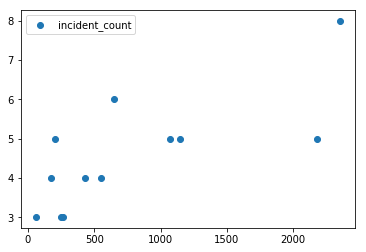

In [231]:
# TODO: Scatter plot of number of routes vs. number of incidents
# ! pip install matplotlib --user
%matplotlib inline

import matplotlib.pyplot as plt
try:
    plt.scatter(x = merged_df['flight_count'], y = merged_df['incident_count'])
    plt.legend()
except:
    raise NotImplementedError()

# Step 5: Integrating Data

Data wrangling typically refers to the process of importing, remapping, and converting data.  On the other hand, data integration typically refers to linking data across heterogeneous sources.  We have an integration problem (in its simplest form) when we want to combine the on-time information (what was originally `flights_df`, and is now in the SQL database) and the route information (`routes_df`).

## 5.1 Relating Routes and Flights: Schema Matching
Now we’ll make use of the on-time flight performance table…  Recall that we put this into an SQL table.

Re-read the flight information into `flights_df`.

Now let’s see if we can actually detect what fields (columns) “match” between `routes_df` and `flights_df` DataFrames.  

To do this, let’s note that we only care about the “categorical” (string-valued) columns.  What we want is, e.g., to find fields that have lots of common values (for instance, airline abbreviations or airport codes).  To measure this in a principled way, we’ll use a measure called the Jaccard distance (or Jaccard index or Jaccard measure).  The Jaccard distance measures similarity between two sets A and B, and is merely:

\begin{equation*}
| A \cap B | / |A \cup B|
\end{equation*}

Let’s compute the Jaccard distances between (the values of) all pairs of attributes in `routes_df` and `flights_df`. This will tell us which attributes include similar values - and thus which might represent the same concept. 

In [232]:
# TODO: get flights from SQL
try:
    flights_df = pd.read_sql_query('select * from flights', engine)


# YOUR CODE HERE
except:
    raise NotImplementedError()

flights_df

YEAR  MONTH  DAY_OF_MONTH CARRIER  FL_NUM ORIGIN DEST  ARR_DELAY_NEW  \
0       2018      1             2      WN    1325    SJU  MCO            0.0   
1       2018      1             2      WN    5159    SJU  MCO            0.0   
2       2018      1             2      WN    5890    SJU  MCO            9.0   
3       2018      1             2      WN    6618    SJU  MCO            0.0   
4       2018      1             2      WN    1701    SJU  MDW            8.0   
5       2018      1             2      WN     844    SJU  TPA           23.0   
6       2018      1             2      WN    4679    SJU  TPA            0.0   
7       2018      1             2      WN    6294    SLC  BUR           20.0   
8       2018      1             2      WN    5245    SLC  DAL            0.0   
9       2018      1             2      WN    2278    SLC  DEN            0.0   
10      2018      1             2      WN    5125    SLC  DEN            7.0   
11      2018      1             2      WN    6215    SLC  DEN            0.0   
12      2018      1             2      WN    6913    SLC  DEN           23.0   
13      2018      1             2      WN    3731    SLC  HOU           94.0   
14      2018      1             2      WN    5549    SLC  LAS            0.0   
15      2018      1             2      WN    5810    SLC  LAS            0.0   
16      2018      1             2      WN    6556    SLC  LAS            0.0   
17      2018      1             2      WN    6599    SLC  LAS           27.0   
18      2018      1             2      WN    5673    SLC  LAX           25.0   
19      2018      1             2      WN    6819    SLC  LAX            0.0   
20      2018      1             2      WN    5053    SLC  MDW            0.0   
21      2018      1             2      WN    5911    SLC  MDW            0.0   
22      2018      1             2      WN    6622    SLC  OAK           29.0   
23      2018      1             2      WN    6671    SLC  OAK            4.0   
24      2018      1             2      WN    6799    SLC  OAK            0.0   
25      2018      1             2      WN    1315    SLC  PHX            0.0   
26      2018      1             2      WN    5007    SLC  PHX           20.0   
27      2018      1             2      WN    5218    SLC  PHX            0.0   
28      2018      1             2      WN    5913    SLC  PHX            0.0   
29      2018      1             2      WN    6909    SLC  PHX            0.0   
...      ...    ...           ...     ...     ...    ...  ...            ...   
570088  2018      1             2      WN     734    SJC  SAN          101.0   
570089  2018      1             2      WN     744    SJC  SAN            7.0   
570090  2018      1             2      WN    1163    SJC  SAN            0.0   
570091  2018      1             2      WN    3527    SJC  SAN          124.0   
570092  2018      1             2      WN    5294    SJC  SAN           75.0   
570093  2018      1             2      WN    5421    SJC  SAN           60.0   
570094  2018      1             2      WN    6225    SJC  SAN            0.0   
570095  2018      1             2      WN    6499    SJC  SAN           80.0   
570096  2018      1             2      WN    6519    SJC  SAN           64.0   
570097  2018      1             2      WN    6562    SJC  SAN          176.0   
570098  2018      1             2      WN    6783    SJC  SAN           45.0   
570099  2018      1             2      WN    6816    SJC  SAN            7.0   
570100  2018      1             2      WN    6850    SJC  SAN            4.0   
570101  2018      1             2      WN    6889    SJC  SAN           68.0   
570102  2018      1             2      WN    4257    SJC  SEA           57.0   
570103  2018      1             2      WN    6211    SJC  SEA          113.0   
570104  2018      1             2      WN    6493    SJC  SEA            6.0   
570105  2018      1             2      WN    6796    SJC  SEA           83.0   
570106  

In [233]:
if len(flights_df) != 570118:
    raise ValueError('Expected a different number of flights')
    
if len(flights_df.columns) != 9:
    raise ValueError('Perhaps you forgot to remove a column? Number of columns isn''t as expected')
    

In [234]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570118 entries, 0 to 570117
Data columns (total 9 columns):
YEAR             570118 non-null int64
MONTH            570118 non-null int64
DAY_OF_MONTH     570118 non-null int64
CARRIER          570118 non-null object
FL_NUM           570118 non-null int64
ORIGIN           570118 non-null object
DEST             570118 non-null object
ARR_DELAY_NEW    551498 non-null float64
CANCELLED        570118 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 39.1+ MB


## Step 5.1: Column / Schema Matches

Create a Cell with an algorithm that iterates over all `routes_df` keys (columns) and all `flights_df` keys.  In a nested map {r → {p → distance}}, the algorithm should store the Jaccard distance between the values in routes column r to the values in performance column p (for distances that are non-zero and only for non-numeric columns).  Remember, since there may be duplicates, you’ll need to convert columns into sets of unique values through `drop_duplicates()`.  


In [269]:
# TODO: create nested map of Jaccard distance
try:
    def jaccard_dist(x_col,y_col):
        common_element = set(x_col).intersection(set(y_col))
        all_element = set(x_col).union(set(y_col))
        return len(common_element)/len(all_element)
    
    x_column = routes_df[['airline_iata','src_iata_icao','target_iata_icao','code_share','equipment']]
    y_column = flights_df[['CARRIER','ORIGIN','DEST']]
    
    best_match = {}
    for i in x_column:
        dict1 = {}
        for j in y_column:
            a = jaccard_dist(x_column[i], y_column[j])
            dict1[j] = a    
        best_match[i] = dict1
       


except:
    raise NotImplementedError()

best_match

{'airline_iata': {'CARRIER': 0.02197802197802198, 'ORIGIN': 0.0, 'DEST': 0.0},
 'src_iata_icao': {'CARRIER': 0.0,
  'ORIGIN': 0.10163624921334173,
  'DEST': 0.10163624921334173},
 'target_iata_icao': {'CARRIER': 0.0,
  'ORIGIN': 0.1018867924528302,
  'DEST': 0.1018867924528302},
 'code_share': {'CARRIER': 0.0, 'ORIGIN': 0.0, 'DEST': 0.0},
 'equipment': {'CARRIER': 0.0,
  'ORIGIN': 0.00023529411764705883,
  'DEST': 0.00023529411764705883}}

In [270]:
if len(best_match) != 5:
    raise ValueError("unexpected number of entries")
if 'airline_iata' not in best_match:
    raise KeyError('Missing airline_iata')
    

The above map should help you decide which pairs of columns (one in each DataFrame) are “semantically equivalent.”  You should be able to find a very clear match between non-numeric codes for airlines in the two DataFrames.  The origin and destination codes will also have corresponding pairs (but if you only look at the Jaccard distances, there will be some ambiguity, since both origin and destination cities have values from the same domain; you will need to use your own knowledge of the semantics of the fields to disambiguate which pairs are correct).


In [271]:
if 'airline_iata' not in best_match:
    raise ValueError('You seem to have dropped something from the dictionary')

# Step 5.2 Creating Detailed Flights, Filtered by OpenFlight Routes

Now that you know how routes_df and flights_df data relate, let’s see how the routes and flights actually relate.  Note that each data source (and thus DataFrame) is in fact incomplete.  For this step we’ll want to only consider the flight information and route information that “intersects.”

## 5.2.1 Flights by Airline and Destination

Create a joint DataFrame `flights_s_df` by merging the two DataFrames on the fields that correspond to flight information.  Use `routes_df.merge` as well as `left_on` and `right_on`.  Note that OpenFlight only has information about certain routes, and we want to focus on the flights corresponding to routes in OpenFlight.

*Hint: you’ll need to pass lists for left_on and right_on in order to merge on the 3 fields between `routes_df` and `flights_df` that you found to “match” in the previous part. These 3 fields should effectively correspond to flights in `flights_df`.*

In [272]:
# TODO: create joint DataFrame flights_s_df 

try:
    flights_s_df = routes_df.merge(flights_df, left_on = ['airline_iata','src_iata_icao','target_iata_icao'], right_on = ['CARRIER','ORIGIN','DEST'])

# YOUR CODE HERE
except:
    raise NotImplementedError()

flights_s_df

airline_iata  airline_id src_iata_icao  source_id target_iata_icao  \
0                9E        3976           ATL       3682              CHA   
1                9E        3976           ATL       3682              CHA   
2                9E        3976           ATL       3682              CHA   
3                9E        3976           ATL       3682              CHA   
4                9E        3976           ATL       3682              CHA   
5                9E        3976           ATL       3682              CHA   
6                9E        3976           ATL       3682              CHA   
7                9E        3976           ATL       3682              CHA   
8                9E        3976           ATL       3682              CHA   
9                9E        3976           ATL       3682              CHA   
10               9E        3976           ATL       3682              CHA   
11               9E        3976           ATL       3682              CHA   
12               9E        3976           ATL       3682              CHA   
13               9E        3976           ATL       3682              CHA   
14               9E        3976           ATL       3682              CHA   
15               9E        3976           ATL       3682              CHA   
16               9E        3976           ATL       3682              CHA   
17               9E        3976           ATL       3682              CHA   
18               9E        3976           ATL       3682              CHA   
19               9E        3976           ATL       3682              CHA   
20               9E        3976           ATL       3682              CHA   
21               9E        3976           ATL       3682              CHA   
22               9E        3976           ATL       3682              CHA   
23               9E        3976           ATL       3682              CHA   
24               9E        3976           ATL       3682              CHA   
25               9E        3976           ATL       3682              CHA   
26               9E        3976           ATL       3682              CHA   
27               9E        3976           ATL       3682              CHA   
28               9E        3976           ATL       3682              CHA   
29               9E        3976           ATL       3682              CHA   
...             ...         ...           ...        ...              ...   
341340           WN        4547           TUS       3636              SAN   
341341           WN        4547           TUS       3636              SAN   
341342           WN        4547           TUS       3636              SAN   
341343           WN        4547           TUS       3636              SAN   
341344           WN        4547           TUS       3636              SAN   
341345           WN        4547           TUS       3636              SAN   
341346           WN        4547           TUS       3636              SAN   
341347           WN        4547           TUS       3636              SAN   
341348           WN        4547           TUS       3636              SAN   
341349           WN        4547           TUS       3636              SAN   
341350           WN        4547           TUS       3636              SAN   
341351           WN        4547           TUS       3636              SAN   
341352           WN        4547           TUS       3636              SAN   
341353           WN        4547           TUS       3636              SAN   
341354           WN        4547           TUS       3636              SAN   
341355           WN        4547           TUS       3636              SAN   
341356           WN        4547           TUS       3636              SAN   
341357           WN        4547           TUS       3636              SAN   
341358           WN        4547           TUS       3636              SAN   
341359           WN        4547           TUS       3636              SAN   
341

In [273]:
if len(flights_s_df) != 341370:
    raise ValueError("unexpected number of entries")
    
if flights_s_df.shape[1] != 18:
    raise ValueError("unexpected number of columns")


## 5.2.2 Grouped airline, destination, and flight

In [274]:
# TODO: output for each airline IATA code and destination city IATA code, the number of flights that appear in flights_s_df
try:
    grouped = flights_s_df.groupby(['airline_iata','target_iata_icao']).count()['target_id']
    grouped_df = grouped_df.to_frame()
    
except:
    raise NotImplementedError()

grouped_df

NotImplementedError: 

In [ ]:
if not 'target_id' in grouped_df.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(grouped_df) != 720:
    raise ValueError("unexpected number of entries")

if grouped_df.shape[1] != 1:
    raise ValueError("unexpected number of fields")



## Step 5.2.2: Delayed Flights by Airline and Destination

Now let’s repeat the above, but only for flights that met a frustrating fate.

For each airline IATA code and destination city IATA code, let's compute the number of flights that appear in the `flights_df`, whose arrival was delayed by 20 minutes or more, or which were cancelled (we’ll call this a “bad” flight in 5.2.3).  Assign this to `delayed_cancelled`.

In [275]:
flights_s_df

airline_iata  airline_id src_iata_icao  source_id target_iata_icao  \
0                9E        3976           ATL       3682              CHA   
1                9E        3976           ATL       3682              CHA   
2                9E        3976           ATL       3682              CHA   
3                9E        3976           ATL       3682              CHA   
4                9E        3976           ATL       3682              CHA   
5                9E        3976           ATL       3682              CHA   
6                9E        3976           ATL       3682              CHA   
7                9E        3976           ATL       3682              CHA   
8                9E        3976           ATL       3682              CHA   
9                9E        3976           ATL       3682              CHA   
10               9E        3976           ATL       3682              CHA   
11               9E        3976           ATL       3682              CHA   
12               9E        3976           ATL       3682              CHA   
13               9E        3976           ATL       3682              CHA   
14               9E        3976           ATL       3682              CHA   
15               9E        3976           ATL       3682              CHA   
16               9E        3976           ATL       3682              CHA   
17               9E        3976           ATL       3682              CHA   
18               9E        3976           ATL       3682              CHA   
19               9E        3976           ATL       3682              CHA   
20               9E        3976           ATL       3682              CHA   
21               9E        3976           ATL       3682              CHA   
22               9E        3976           ATL       3682              CHA   
23               9E        3976           ATL       3682              CHA   
24               9E        3976           ATL       3682              CHA   
25               9E        3976           ATL       3682              CHA   
26               9E        3976           ATL       3682              CHA   
27               9E        3976           ATL       3682              CHA   
28               9E        3976           ATL       3682              CHA   
29               9E        3976           ATL       3682              CHA   
...             ...         ...           ...        ...              ...   
341340           WN        4547           TUS       3636              SAN   
341341           WN        4547           TUS       3636              SAN   
341342           WN        4547           TUS       3636              SAN   
341343           WN        4547           TUS       3636              SAN   
341344           WN        4547           TUS       3636              SAN   
341345           WN        4547           TUS       3636              SAN   
341346           WN        4547           TUS       3636              SAN   
341347           WN        4547           TUS       3636              SAN   
341348           WN        4547           TUS       3636              SAN   
341349           WN        4547           TUS       3636              SAN   
341350           WN        4547           TUS       3636              SAN   
341351           WN        4547           TUS       3636              SAN   
341352           WN        4547           TUS       3636              SAN   
341353           WN        4547           TUS       3636              SAN   
341354           WN        4547           TUS       3636              SAN   
341355           WN        4547           TUS       3636              SAN   
341356           WN        4547           TUS       3636              SAN   
341357           WN        4547           TUS       3636              SAN   
341358           WN        4547           TUS       3636              SAN   
341359           WN        4547           TUS       3636              SAN   
341

In [276]:
# TODO: output bad flights
try:
    df = flights_s_df[(flights_s_df['ARR_DELAY_NEW'] >=20) | (flights_s_df['CANCELLED'] == 1.0)]
    delayed_cancelled = df.groupby(['airline_iata','target_iata_icao']).count()[['airline_id']]
    delayed_cancelled = delayed_cancelled.rename(columns = {'airline_id':'target_id'})
# YOUR CODE HERE
except:
    raise NotImplementedError()

df


airline_iata  airline_id src_iata_icao  source_id target_iata_icao  \
1                9E        3976           ATL       3682              CHA   
2                9E        3976           ATL       3682              CHA   
5                9E        3976           ATL       3682              CHA   
9                9E        3976           ATL       3682              CHA   
13               9E        3976           ATL       3682              CHA   
23               9E        3976           ATL       3682              CHA   
30               9E        3976           ATL       3682              CHA   
50               9E        3976           ATL       3682              CID   
54               9E        3976           ATL       3682              CID   
55               9E        3976           ATL       3682              CID   
60               9E        3976           ATL       3682              CID   
72               9E        3976           ATL       3682              CRW   
78               9E        3976           ATL       3682              CRW   
79               9E        3976           ATL       3682              CRW   
83               9E        3976           ATL       3682              CRW   
84               9E        3976           ATL       3682              CRW   
100              9E        3976           ATL       3682              CRW   
104              9E        3976           ATL       3682              CRW   
107              9E        3976           ATL       3682              CRW   
112              9E        3976           ATL       3682              CRW   
113              9E        3976           ATL       3682              CRW   
114              9E        3976           ATL       3682              CRW   
132              9E        3976           ATL       3682              CRW   
139              9E        3976           ATL       3682              CRW   
140              9E        3976           ATL       3682              CRW   
159              9E        3976           ATL       3682              EVV   
160              9E        3976           ATL       3682              EVV   
164              9E        3976           ATL       3682              EVV   
165              9E        3976           ATL       3682              EVV   
172              9E        3976           ATL       3682              EVV   
...             ...         ...           ...        ...              ...   
341022           WN        4547           TUL       3855              STL   
341031           WN        4547           TUS       3636              DEN   
341033           WN        4547           TUS       3636              DEN   
341074           WN        4547           TUS       3636              DEN   
341084           WN        4547           TUS       3636              DEN   
341091           WN        4547           TUS       3636              DEN   
341101           WN        4547           TUS       3636              LAS   
341102           WN        4547           TUS       3636              LAS   
341108           WN        4547           TUS       3636              LAS   
341115           WN        4547           TUS       3636              LAS   
341148           WN        4547           TUS       3636              LAS   
341163           WN        4547           TUS       3636              LAS   
341169           WN        4547           TUS       3636              LAS   
341210           WN        4547           TUS       3636              LAX   
341211           WN        4547           TUS       3636              LAX   
341249           WN        4547           TUS       3636              LAX   
341251           WN        4547           TUS       3636              LAX   
341253           WN        4547           TUS       3636              LAX   
341259           WN        4547           TUS       3636              LAX   
341265           WN        4547           TUS       3636              LAX   
341

In [277]:

if not 'target_id' in delayed_cancelled.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(delayed_cancelled) != 700:
    raise ValueError("unexpected number of entries")

if delayed_cancelled.shape[1] != 1:
    raise ValueError("unexpected number of fields")



## Step 5.2.3: Route Pairs with Multiple Bad Flights

Compute in the dataframe `multiple_bad` the number of “bad” flights for each (airline IATA code, destination city IATA code) pair if that pair has more than five “bad” flights. 

In [278]:
# TODO: pairs with more than five bad flights
try:
    multiple_bad = delayed_cancelled[delayed_cancelled['target_id'] > 5.0]

# YOUR CODE HERE
except:
    raise NotImplementedError()

multiple_bad


target_id
airline_iata target_iata_icao           
9E           ATL                      74
             CHA                       7
             CRW                      14
             EVV                      12
             JFK                      11
             LEX                      10
             LGA                      16
             MSY                      31
             TYS                      18
AA           ABQ                      18
             ALB                       8
             ATL                     127
             AUS                      99
             BDL                      54
             BNA                      65
             BOS                     470
             BUF                      16
             BWI                      56
             CHS                      30
             CLE                      45
             CLT                    1014
             CMH                      24
             COS                      14
             CVG                       8
             DAY                      13
             DCA                     275
             DEN                     120
             DFW                    1219
             DSM                      17
             DTW                      69
...                                  ...
WN           OMA                      70
             ONT                     115
             ORF                      44
             PBI                      54
             PDX                      73
             PHL                     138
             PHX                    1364
             PIT                     102
             PNS                      16
             PVD                      75
             PWM                      12
             RDU                     149
             RIC                      13
             RNO                      53
             ROC                      15
             RSW                     102
             SAN                     392
             SAT                     198
             SDF                      52
             SEA                      76
             SFO                     321
             SJC                     248
             SJU                      80
             SLC                     112
             SMF                     239
             SNA                     156
             STL                     354
             TPA                     369
             TUL                      49
             TUS                      45

[547 rows x 1 columns]

In [279]:
if not 'target_id' in multiple_bad.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')
    
if len(multiple_bad) != 547:
    raise ValueError("unexpected number of entries")

if multiple_bad.shape[1] != 1:
    raise ValueError("unexpected number of fields")


## Step 5.2.4:Multiply Delayed Flights by Airline

What if we re-examine the above question, but by airline instead of by city?  Compute that as `airlines_delayed_cancelled`.  

It should contain, for each airline IATA code, the number of flights that appear in `flights_s_df`, whose arrival was delayed by 30 minutes or more, or which were cancelled.  **Sort** by number of delays/cancellations in decreasing order.


In [280]:
# TODO: delayed flights by airline
try:
    df2 = flights_s_df[(flights_s_df['ARR_DELAY_NEW'] >= 30) | (flights_s_df['CANCELLED'] == 1.0)]
    airlines_delayed_cancelled = df2.groupby('airline_iata').count()[['airline_id']].rename(columns = {'airline_id':'target_id'})
    airlines_delayed_cancelled = airlines_delayed_cancelled.sort_values(by = ['target_id'], ascending = False)
# YOUR CODE HERE
except:
    raise NotImplementedError()
airlines_delayed_cancelled

target_id
airline_iata           
WN                10362
AA                 7938
DL                 7634
B6                 5588
UA                 4568
AS                  806
NK                  770
G4                  538
VX                  529
F9                  402
HA                  312
9E                  183

In [281]:
if not 'target_id' in airlines_delayed_cancelled.columns:
    raise KeyError('airlines_delayed_cancelled should have a target_id')

if len(airlines_delayed_cancelled) != 12:
    raise ValueError("unexpected number of entries")

if airlines_delayed_cancelled.shape[1] != 1:
    raise ValueError("unexpected number of fields")

